In [78]:
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras. layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
import keras.backend as K
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.utils.vis_utils import plot_model
import math
import time
from math import sqrt
from sklearn.impute import KNNImputer

In [80]:
X_train = pd.read_csv('X_train_scaled.csv')
y_train = pd.read_csv('y_train_scaled.csv')
X_cv = pd.read_csv('X_val_scaled.csv')
y_cv = pd.read_csv('y_val_scaled.csv')
X_train_cv = pd.read_csv('X_train_val_scaled.csv')
y_train_cv = pd.read_csv('y_train_val_scaled.csv')
X_test = pd.read_csv('X_test_scaled.csv')
y_test = pd.read_csv('y_test_scaled.csv')

val =  pd.read_csv('val.csv')
y_val = pd.read_csv('y_val.csv')
test =  pd.read_csv('test.csv')
test_y = pd.read_csv('y_test.csv')

 ## Defining LSTM Model & MAPE Functions

In [81]:
def run(neurons, batchSize, numEpochs, X, Y, pred_set, orig, col_mean, col_std):
    #Reshaping
    trainX =np.array(X)
    X = trainX.reshape(X.shape[0], 1, X.shape[1])
    
    testX =np.array(pred_set)
    pred_set = testX.reshape(pred_set.shape[0], 1, pred_set.shape[1])
    
    #Building the LSTM Model
    lstm = Sequential()
    lstm.add(LSTM(neurons, input_shape=(1, trainX.shape[1]), activation="relu", return_sequences=False))
    lstm.add(Dense(1))
    lstm.compile(loss="mean_squared_error", optimizer="adam")
    plot_model(lstm, show_shapes=True, show_layer_names=True)

    ##################################################
    
    # Fitting the RNN to the Training set
    history = lstm.fit(X, Y, epochs=numEpochs, batch_size=batchSize, verbose=1, shuffle=False)
    predicted_Price = lstm.predict(pred_set)
    
    predicted_price_df = pd.DataFrame(predicted_Price, columns=['Predicted Price'])
    
    # Scale Back Result
    est = predicted_price_df['Predicted Price'] * col_std + col_mean

    rmse = sqrt(mean_squared_error(orig, est))
    mape = get_mape(orig, est)
    
    # Calculate RMSE
    print("RMSE on train set = %0.3f" % rmse)
    # Calculate MAPE
    print("MAPE on train set = %0.3f%%" % mape)

    return rmse, mape

In [82]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

## Tuning Epochs Param

In [83]:
# vary training batches
param_label = 'epochs'
param_list = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
# param_list = [10]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_batch_size = 32
default_neurons = 32

for param in param_list:
    rmse, mape = run(default_neurons, default_batch_size, param, X_train, y_train, X_cv, y_val, val['Close_mean'], val['Close_std'])
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
14/14 [==============================] - 1s 2ms/step - loss: 0.4333
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.2536
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.1756
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.1307
Epoch 5/50
14/14 [==============================] - 0s 2ms/step - loss: 0.0970
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.0730
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.0572
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.0470
Epoch 9/50
14/14 [==============================] - 0s 2ms/step - loss: 0.0397
Epoch 10/50
14/14 [==============================] - 0s 2ms/step - loss: 0.0343
Epoch 11/50
14/14 [============================

14/14 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 49/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 50/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 51/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 52/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0127
Epoch 53/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 54/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 55/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 56/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 57/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 58/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 59/100
14/14 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 60/100
14/14 [=====================

14/14 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 47/150
14/14 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 48/150
14/14 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 49/150
14/14 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 50/150
14/14 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 51/150
14/14 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 52/150
14/14 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 53/150
14/14 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 54/150
14/14 [==============================] - 0s 1ms/step - loss: 0.0122
Epoch 55/150
14/14 [==============================] - 0s 1ms/step - loss: 0.0153
Epoch 56/150
14/14 [==============================] - 0s 1ms/step - loss: 0.0273
Epoch 57/150
14/14 [==============================] - 0s 1ms/step - loss: 0.0249
Epoch 58/150
14/14 [=====================

14/14 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 147/150
14/14 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 148/150
14/14 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 149/150
14/14 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 150/150
14/14 [==============================] - 0s 1ms/step - loss: 0.0031
RMSE on train set = 3259.534
MAPE on train set = 18.924%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/200
14/14 [==============================] - 1s 2ms/step - loss: 0.7417
Epoch 2/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3581
Epoch 3/200
14/14 [==============================] - 0s 1ms/step - loss: 0.1823
Epoch 4/200
14/14 [==============================] - 0s 1ms/step - loss: 0.1566
Epoch 5/200
14/14 [==============================] - 0s 1ms/step 

14/14 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 95/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 96/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 97/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 98/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 99/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0082
Epoch 100/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 101/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 102/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 103/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 104/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 105/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 106/200
14/14 [==============

14/14 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 195/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 196/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 197/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 198/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 199/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 200/200
14/14 [==============================] - 0s 1ms/step - loss: 0.0077
RMSE on train set = 3145.371
MAPE on train set = 18.973%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/250
14/14 [==============================] - 1s 1ms/step - loss: 0.7591
Epoch 2/250
14/14 [==============================] - 0s 1ms/step - loss: 0.2778
Epoch 3/250
14/14 [==============================] - 0s 1ms/s

14/14 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 93/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 94/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 95/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 96/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 97/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 98/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 99/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 100/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 101/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 102/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 103/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 104/250
14/14 [================

14/14 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 193/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 194/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 195/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 196/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 197/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 198/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 199/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0030
Epoch 200/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 201/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 202/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 203/250
14/14 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 204/250
14/14 [=========

Epoch 40/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0116
Epoch 41/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 42/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0125
Epoch 43/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0159
Epoch 44/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0206
Epoch 45/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0348
Epoch 46/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0269
Epoch 47/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0318
Epoch 48/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0162
Epoch 49/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0136
Epoch 50/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 51/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 52/300
14/14 [========

14/14 [==============================] - 0s 1ms/step - loss: 0.0100
Epoch 141/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 142/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0109
Epoch 143/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0094
Epoch 144/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 145/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0095
Epoch 146/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 147/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 148/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0111
Epoch 149/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 150/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 151/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 152/300
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 241/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 242/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 243/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 244/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0062
Epoch 245/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0050
Epoch 246/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 247/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 248/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 249/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 250/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 251/300
14/14 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 252/300
14/14 [=========

Epoch 38/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 39/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0088
Epoch 40/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 41/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 42/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 43/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 44/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 45/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 46/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 47/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 48/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 49/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0131
Epoch 50/350
14/14 [========

14/14 [==============================] - 0s 1ms/step - loss: 0.0079
Epoch 139/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 140/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 141/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 142/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 143/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 144/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 145/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 146/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0092
Epoch 147/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 148/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0103
Epoch 149/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 150/350
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 0.0067
Epoch 239/350
14/14 [==============================] - 0s 2ms/step - loss: 0.0054
Epoch 240/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 241/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 242/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 243/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 244/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 245/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 246/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0071
Epoch 247/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0061
Epoch 248/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 249/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0064
Epoch 250/350
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 339/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 340/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 341/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 342/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0052
Epoch 343/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 344/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 345/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 346/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 347/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 348/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0058
Epoch 349/350
14/14 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 350/350
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 0.0119
Epoch 87/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0104
Epoch 88/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0141
Epoch 89/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 90/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 91/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 92/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 93/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 94/400
14/14 [==============================] - 0s 2ms/step - loss: 0.0088
Epoch 95/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0066
Epoch 96/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0070
Epoch 97/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 98/400
14/14 [=====================

14/14 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 187/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 188/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 189/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 190/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 191/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 192/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 193/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 194/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 195/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 196/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 197/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 198/400
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 287/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 288/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 289/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 290/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 291/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 292/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 293/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 294/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 295/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0016
Epoch 296/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 297/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 298/400
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 386/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 387/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 388/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 389/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0027
Epoch 390/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0032
Epoch 391/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 392/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0039
Epoch 393/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 394/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 395/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0133
Epoch 396/400
14/14 [==============================] - 0s 1ms/step - loss: 0.0156
Epoch 397/400
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 0.0175
Epoch 84/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0146
Epoch 85/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0155
Epoch 86/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0132
Epoch 87/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0137
Epoch 88/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0121
Epoch 89/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 90/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 91/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0117
Epoch 92/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 93/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0112
Epoch 94/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0101
Epoch 95/450
14/14 [=====================

14/14 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 184/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 185/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0083
Epoch 186/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 187/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0084
Epoch 188/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0073
Epoch 189/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0085
Epoch 190/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 191/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 192/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 193/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 194/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 195/450
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 284/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 285/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 286/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 287/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 288/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0043
Epoch 289/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 290/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 291/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 292/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 293/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0057
Epoch 294/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 295/450
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 384/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0072
Epoch 385/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0090
Epoch 386/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0069
Epoch 387/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 388/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 389/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0065
Epoch 390/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0049
Epoch 391/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0053
Epoch 392/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 393/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 394/450
14/14 [==============================] - 0s 1ms/step - loss: 0.0035
Epoch 395/450
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 0.0123
Epoch 31/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0118
Epoch 32/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0114
Epoch 33/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0110
Epoch 34/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0106
Epoch 35/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0102
Epoch 36/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 37/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 38/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0093
Epoch 39/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 40/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0089
Epoch 41/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0091
Epoch 42/500
14/14 [=====================

14/14 [==============================] - 0s 1ms/step - loss: 0.0105
Epoch 131/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0074
Epoch 132/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 133/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 134/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0063
Epoch 135/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 136/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 137/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0047
Epoch 138/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 139/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 140/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0051
Epoch 141/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0048
Epoch 142/500
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 0.0140
Epoch 231/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0108
Epoch 232/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0142
Epoch 233/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0097
Epoch 234/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 235/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0075
Epoch 236/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 237/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0056
Epoch 238/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0059
Epoch 239/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0044
Epoch 240/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 241/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 242/500
14/14 [=========

14/14 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 331/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0030
Epoch 332/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0040
Epoch 333/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 334/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 335/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 336/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0095
Epoch 337/500
14/14 [==============================] - 0s 2ms/step - loss: 0.0086
Epoch 338/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0128
Epoch 339/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0096
Epoch 340/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0124
Epoch 341/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0081
Epoch 342/500
14/14 [=========

14/14 [==============================] - 0s 1ms/step - loss: 0.0025
Epoch 431/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 432/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 433/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 434/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 435/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0020
Epoch 436/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0024
Epoch 437/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0023
Epoch 438/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 439/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0031
Epoch 440/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 441/500
14/14 [==============================] - 0s 1ms/step - loss: 0.0045
Epoch 442/500
14/14 [=========

,epochs,rmse,mape
0,50,2976.516627,18.742986
1,100,3019.030148,18.864314
2,150,3259.534342,18.923606
3,200,3145.370964,18.973498
4,250,3004.126586,18.845060
5,300,3071.052650,18.937202
6,350,3070.321512,19.022480
7,400,3012.125019,18.859534
8,450,3208.815947,19.206723
9,500,3046.774888,19.168900


In [84]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
epoch_opt = temp['epochs'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(epoch_opt))

min RMSE = 2976.517
optimum params = 50


In [85]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['epochs'].values[0]))

min MAPE = 18.743%
optimum params = 50


## Tuning Batch Size Parameter

In [86]:
# vary training batches
param_label = 'batch_size'
param_list = [32, 64, 128, 256]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_neurons = 32

for param in param_list:
    rmse, mape = run(default_neurons, param, epoch_opt, X_train, y_train, X_cv, y_val, val['Close_mean'], val['Close_std'])
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
14/14 [==============================] - 1s 1ms/step - loss: 0.7869
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.3580
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.1849
Epoch 4/50
14/14 [==============================] - 0s 2ms/step - loss: 0.1462
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.1186
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.1012
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.0862
Epoch 8/50
14/14 [==============================] - 0s 2ms/step - loss: 0.0747
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.0649
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.0566
Epoch 11/50
14/14 [============================

7/7 [==============================] - 0s 2ms/step - loss: 0.0114
RMSE on train set = 2946.845
MAPE on train set = 18.651%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
4/4 [==============================] - 1s 2ms/step - loss: 1.0642
Epoch 2/50
4/4 [==============================] - 0s 2ms/step - loss: 0.8093
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6019
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.4335
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 0.3070
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.2240
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.1828
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.1712
Epoch 9/50
4/4 [==============================] - 0s 2ms/step - loss: 0.1683
Epoch 10/50
4/4 [=====

2/2 [==============================] - 0s 3ms/step - loss: 0.0538
Epoch 50/50
2/2 [==============================] - 0s 3ms/step - loss: 0.0519
RMSE on train set = 3210.686
MAPE on train set = 18.535%


,batch_size,rmse,mape
0,32,2743.900358,18.590431
1,64,2946.845125,18.650504
2,128,2824.449538,18.618358
3,256,3210.685661,18.535278


In [87]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
batch_size_opt = temp['batch_size'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(batch_size_opt))

min RMSE = 2743.900
optimum params = 32


In [88]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['batch_size'].values[0]))

min MAPE = 18.535%
optimum params = 256


In [89]:
# vary neurons
param_label = 'neurons'
param_list = [10, 20, 30, 40, 50]
error_rate = {param_label: [], 'rmse': [], 'mape': []}
default_batch_size = 32

for param in param_list:
    rmse, mape = run(param, default_batch_size, epoch_opt, X_train, y_train, X_cv, y_val, val['Close_mean'], val['Close_std'])
    
    # Collect results
    error_rate[param_label].append(param)
    error_rate['rmse'].append(rmse)
    error_rate['mape'].append(mape)

error_rate = pd.DataFrame(error_rate)
error_rate

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
14/14 [==============================] - 1s 2ms/step - loss: 1.3908
Epoch 2/50
14/14 [==============================] - 0s 2ms/step - loss: 0.8592
Epoch 3/50
14/14 [==============================] - 0s 2ms/step - loss: 0.5243
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3787
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.3206
Epoch 6/50
14/14 [==============================] - 0s 2ms/step - loss: 0.2811
Epoch 7/50
14/14 [==============================] - 0s 2ms/step - loss: 0.2490
Epoch 8/50
14/14 [==============================] - 0s 1ms/step - loss: 0.2187
Epoch 9/50
14/14 [==============================] - 0s 1ms/step - loss: 0.1926
Epoch 10/50
14/14 [==============================] - 0s 1ms/step - loss: 0.1702
Epoch 11/50
14/14 [============================

14/14 [==============================] - 0s 1ms/step - loss: 0.0080
Epoch 49/50
14/14 [==============================] - 0s 1ms/step - loss: 0.0076
Epoch 50/50
14/14 [==============================] - 0s 1ms/step - loss: 0.0077
RMSE on train set = 3001.245
MAPE on train set = 19.023%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
14/14 [==============================] - 1s 2ms/step - loss: 1.0729
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.5322
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.2470
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.1948
Epoch 5/50
14/14 [==============================] - 0s 1ms/step - loss: 0.1645
Epoch 6/50
14/14 [==============================] - 0s 1ms/step - loss: 0.1430
Epoch 7/50
14/14 [==============================] - 0s 1ms/step - loss: 0.1241


14/14 [==============================] - 0s 1ms/step - loss: 0.0099
Epoch 46/50
14/14 [==============================] - 0s 2ms/step - loss: 0.0085
Epoch 47/50
14/14 [==============================] - 0s 1ms/step - loss: 0.0086
Epoch 48/50
14/14 [==============================] - 0s 1ms/step - loss: 0.0077
Epoch 49/50
14/14 [==============================] - 0s 1ms/step - loss: 0.0078
Epoch 50/50
14/14 [==============================] - 0s 1ms/step - loss: 0.0073
RMSE on train set = 2826.832
MAPE on train set = 18.692%
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
14/14 [==============================] - 1s 1ms/step - loss: 0.5626
Epoch 2/50
14/14 [==============================] - 0s 1ms/step - loss: 0.2533
Epoch 3/50
14/14 [==============================] - 0s 1ms/step - loss: 0.1385
Epoch 4/50
14/14 [==============================] - 0s 1ms/step - loss: 0.12

,neurons,rmse,mape
0,10,3018.147402,18.838921
1,20,3001.244768,19.023132
2,30,2899.240398,18.743273
3,40,2826.832347,18.692268
4,50,2771.371870,18.514096


In [90]:
# Get optimum value for param 
temp = error_rate[error_rate['rmse'] == error_rate['rmse'].min()]
neurons_opt = temp['neurons'].values[0]
print("min RMSE = %0.3f" % error_rate['rmse'].min())
print("optimum params = " + str(neurons_opt))

min RMSE = 2771.372
optimum params = 50


In [91]:
# Get optimum value for param, using MAPE
temp = error_rate[error_rate['mape'] == error_rate['mape'].min()]
print("min MAPE = %0.3f%%" % error_rate['mape'].min())
print("optimum params = " + str(temp['neurons'].values[0]))

min MAPE = 18.514%
optimum params = 50


## Model with Optimal Parameters

In [92]:
# Process the data for LSTM
testX =np.array(X_test)
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])
traincvX =np.array(X_train_cv)
X_train_cv = traincvX.reshape(X_train_cv.shape[0], 1, X_train_cv.shape[1])

In [93]:
# Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, traincvX.shape[1]), activation="relu", return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss="mean_squared_error", optimizer="adam")
plot_model(lstm, show_shapes=True, show_layer_names=True)

# Model Training
history = lstm.fit(X_train_cv, y_train_cv, epochs = epoch_opt, batch_size = batch_size_opt, verbose=1, shuffle=False)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.
Epoch 1/50
19/19 [==============================] - 1s 2ms/step - loss: 1.1181
Epoch 2/50
19/19 [==============================] - 0s 2ms/step - loss: 0.5244
Epoch 3/50
19/19 [==============================] - 0s 1ms/step - loss: 0.2625
Epoch 4/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1936
Epoch 5/50
19/19 [==============================] - 0s 2ms/step - loss: 0.1420
Epoch 6/50
19/19 [==============================] - 0s 1ms/step - loss: 0.1119
Epoch 7/50
19/19 [==============================] - 0s 1ms/step - loss: 0.0894
Epoch 8/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0722
Epoch 9/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0592
Epoch 10/50
19/19 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 11/50
19/19 [============================

In [97]:
# LSTM Prediction
y_pred = lstm.predict(X_test)

predicted_price_df = pd.DataFrame(y_pred, columns=['Predicted Price'])
    
# Scale Back Result
est = predicted_price_df['Predicted Price'] * test['Close_std'] + test['Close_mean']


rmse = sqrt(mean_squared_error(test_y, est))
mape = get_mape(test_y, est)

# Calculate RMSE
print("RMSE on train set = %0.3f" % rmse)
# Calculate MAPE
print("MAPE on train set = %0.3f%%" % mape)

RMSE on train set = 3697.848
MAPE on train set = 23.392%


In [98]:
X_test

array([[[-0.4165986 ,  1.71250294,  1.7875334 , ...,  0.29271302,
          0.47640873,  0.21768313]],

       [[-0.4165986 ,  1.69715058,  2.75287559, ..., -0.51018981,
         -0.21903377, -1.08460307]],

       [[-0.4165986 ,  1.84890711,  3.33121021, ...,  0.9872895 ,
          1.01218783,  0.60547011]],

       ...,

       [[-0.55438962,  1.07658239,  4.03527645, ..., -0.22147178,
         -0.03571401, -1.4803278 ]],

       [[-1.23279787,  1.14404415,  3.00493077, ..., -0.36710952,
          0.07016988, -1.30002736]],

       [[-0.90631132,  1.11533345,  2.10300893, ..., -1.13453422,
         -0.95315038, -2.46065515]]])

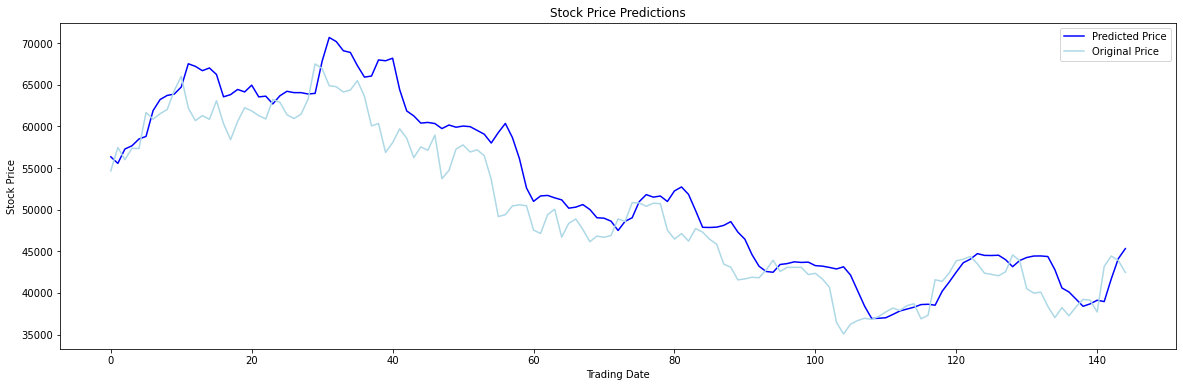

In [99]:
plt.plot(est, color = 'blue', label = 'Predicted Price')
plt.plot(test_y, color = 'lightblue', label = 'Original Price')
 
plt.title('Stock Price Predictions')
plt.xlabel('Trading Date')
plt.xticks(np.arange(0, 160, step=20))  
plt.ylabel('Stock Price')
 
plt.legend()
fig=plt.gcf()
fig.set_figwidth(20)
fig.set_figheight(6)
plt.show()

## Prediction

In [100]:
predict_feature = pd.read_csv('predict_feature.csv')
predict_feature_orig = pd.read_csv('predict_feature_orig.csv')

In [101]:
# Process the data for LSTM
testX =np.array(predict_feature)
predict_feature = testX.reshape(predict_feature.shape[0], 1, predict_feature.shape[1])
predict_feature

array([[[-0.79500295,  0.99478636,  2.69379289, -0.91053679,
          0.30621419,  0.71920306, -0.32882933, -0.16651058,
         -1.43744719, -0.72267876,  0.94996311,  2.80817493,
         -0.91092801,  0.37921589,  0.64249732, -0.52598084,
         -0.24997117, -1.61802785, -0.75104984,  0.88965262,
          3.2483529 , -0.98726414,  0.59240154,  0.57416853,
         -0.66192609, -0.33907478, -1.78608512, -0.86170985,
          0.8319429 ,  2.8508659 , -0.91046227,  0.56229217,
          0.52108076, -0.81476911, -0.49192647, -1.90525532,
         -0.77804137,  0.84418974,  2.78690145, -1.02213244,
          0.67478063,  0.56252312, -0.65679442, -0.36023371,
         -1.62136398]]])

In [106]:
predicted_price = lstm.predict(predict_feature)

predicted_price_df = pd.DataFrame(predicted_price, columns=['Predicted Price'])
    
# Scale Back Result
close_mean = test['Close_mean'][-5:].mean()
close_std = test['Close_std'][-5:].mean()
est = predicted_price_df['Predicted Price'] * close_std + close_mean

In [109]:
est

0    41588.84375
Name: Predicted Price, dtype: float32

Reality: Bitcoin currency had a close price of USD 39,137.61 on 4 Mar 2022.

Prediced: Our model predicted the currency to have a close price of USD 41588.84 on 4 Mar 2022.